In [6]:
import matplotlib.pyplot as plt
import pandas as pd

## Heikin Ashi

In [7]:
def HeikinAshi(df_HA):
    HAdf = df_HA[['open', 'high', 'low', 'close']]
    
    #Closing
    HAdf['close'] = round(((df_HA['open'] + df_HA['high'] + df_HA['low'] + df_HA['close'])/4),2)
    
    #Opening
    for i in range(len(df_HA)):
        if i == 0:
            HAdf.iat[0,0] = round(((df_HA['open'].iloc[0] + df_HA['close'].iloc[0])/2),2)
        else:
            HAdf.iat[i,0] = round(((HAdf.iat[i-1,0] + HAdf.iat[i-1,3])/2),2)
            
    #High & Low
    HAdf['high'] = HAdf.loc[:,['open', 'close']].join(df_HA['high']).max(axis=1)
    HAdf['low'] = HAdf.loc[:,['open', 'close']].join(df_HA['low']).min(axis=1)
    
    return HAdf.close

## Moving Average

In [8]:
def MovingAverage(df_close, length=11):
    movAve = df_close.rolling(window = length).mean()
    return movAve

## MACD

In [28]:
def MACD(df_macd, fast_length = 12, slow_length = 26, signal_smoothing = 9):
    FASTLENGTH = df_macd['HeikinAshi'].ewm(span=fast_length, adjust= False).mean()
    SLOWLENGTH = df_macd['HeikinAshi'].ewm(span=slow_length , adjust= False).mean()
    MACD = FASTLENGTH - SLOWLENGTH # GREEN
    SIGNAL = MACD.ewm(span=signal_smoothing , adjust= False).mean() # RED 
      
    return MACD, SIGNAL

## MACD SIGNALS

In [10]:
def SignalFromMACD(data):
    Buy,Sell = [],[]
    for i in range(2 , len(data)):
        if data.MACD.iloc[i] > data.SIGNAL.iloc[i] and data.MACD.iloc[i-1] < data.SIGNAL.iloc[i-1]:
            Buy.append(i)
        if data.MACD.iloc[i] < data.SIGNAL.iloc[i] and data.MACD.iloc[i-1] > data.SIGNAL.iloc[i-1]:
            Sell.append(i)
            
    return Buy,Sell

## Data Stream

In [11]:
dfd = pd.read_csv('data.csv', index_col=False)[201:400]

### Removing Index

In [12]:
dfd.reset_index(drop=True, inplace=True)

## Heikin Ashi & Moving Average to DataFrame

In [13]:
HA = HeikinAshi(dfd)
MA = MovingAverage(HA)

data = {'HeikinAshi': HA,"MovingAverage":MA}
df = pd.DataFrame(data)

<ipython-input-7-a020064f262b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HAdf['close'] = round(((df_HA['open'] + df_HA['high'] + df_HA['low'] + df_HA['close'])/4),2)
<ipython-input-7-a020064f262b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HAdf['high'] = HAdf.loc[:,['open', 'close']].join(df_HA['high']).max(axis=1)
<ipython-input-7-a020064f262b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

## MACD to DataFrame

In [39]:
df['MACD'] = MACD(df)[0]
df['SIGNAL'] = MACD(df)[1]

## Buy - Sell Signals

In [16]:
BuyPrice = df.iloc[SignalFromMACD(df)[0]].HeikinAshi
SellPrice = df.iloc[SignalFromMACD(df)[1]].HeikinAshi

BuyIndex = SignalFromMACD(df)[0]
SellIndex = SignalFromMACD(df)[1]

## Visualization

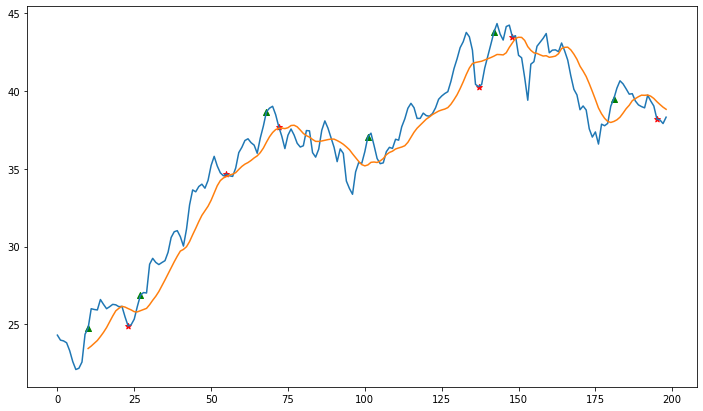

In [17]:
df.HeikinAshi.plot(figsize=(12,7))
df.MovingAverage.plot()
plt.scatter(BuyIndex,BuyPrice, marker ="^", color = 'green')
plt.scatter(SellIndex,SellPrice, marker ="*", color = 'red')